In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_customers = pd.read_csv('./datasets/customers.csv')
print(df_customers.shape)
df_customers.head()

(1000, 8)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [3]:
df_credit_profiles = pd.read_csv('./datasets/credit_profiles.csv')
print(df_credit_profiles.shape)
df_credit_profiles.head()

(1004, 6)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [4]:
df_transactions = pd.read_csv('./datasets/transactions.csv')
print(df_transactions.shape)
df_transactions.head()

(500000, 7)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


# DATA CLEANING FOR ANNUAL INCOME
### Handling NaN Values

In [5]:
df_customers.isna().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

#### Annual Income column has 50 NaN values

In [6]:
df_customers[df_customers['annual_income'].isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Verma,Male,52,City,Business Owner,NaN,Single
186,187,Samar Sardar,Male,53,City,Consultant,NaN,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,NaN,Married
232,233,Aditya Goel,Male,26,City,Freelancer,NaN,Married


In [7]:
occupation_wise_median = df_customers.groupby('occupation')['annual_income'].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [8]:
df_customers['annual_income'] = df_customers.apply(lambda row: occupation_wise_median[row['occupation']] if pd.isna(row['annual_income']) else row['annual_income'] ,axis=1)
df_customers.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [9]:
df_customers.loc[[14,82,97,96]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,261191.5,Married
96,97,Yash Acharya,Male,51,City,Business Owner,387177.0,Married


In [10]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


### Handling Outliers

In [11]:
df_customers[df_customers['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [12]:
df_customers['annual_income'] = df_customers.apply(lambda row: occupation_wise_median[row['occupation']] if row['annual_income']<100 else row['annual_income'] ,axis=1)
df_customers[df_customers['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


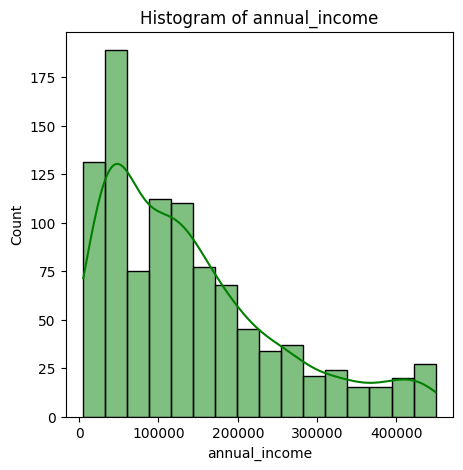

In [13]:
plt.figure(figsize=(5, 5))
sns.histplot(df_customers['annual_income'], kde=True, color='green', label='Data')
plt.title('Histogram of annual_income')
plt.show()

In [14]:
df_customers.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


# DATA VISUALISATION FOR ANNUAL INCOME

In [15]:
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [16]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


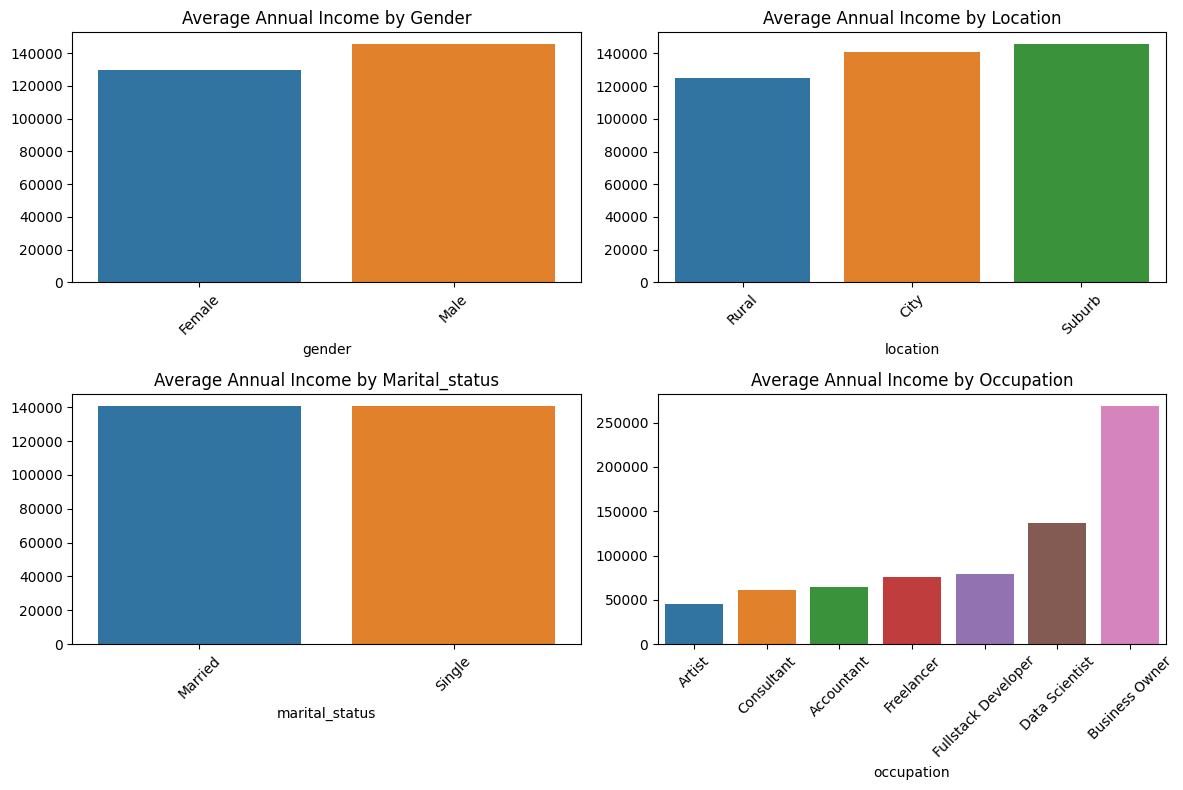

In [17]:
cols_name = ['gender','location','marital_status','occupation']

# Create a grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))  # 2 rows, 2 columns

# Flatten the axes for easy iteration
axes = axes.flatten()

for i,col in enumerate(cols_name):
    col_wise_annual_income = df_customers.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(
        x=col_wise_annual_income.index, 
        y=col_wise_annual_income.values, 
        palette='tab10', 
        ax=axes[i]  # Specify subplot axis
    )
    axes[i].set_title(f"Average Annual Income by {col.capitalize()}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### DATA CLEANING FOR AGE COLUMN

In [18]:
df_customers['age'].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

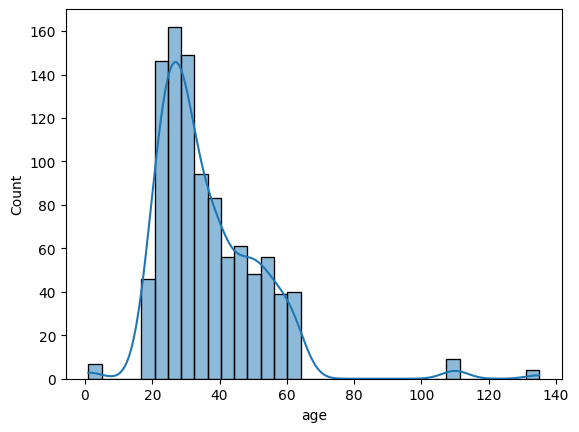

In [19]:
sns.histplot(df_customers['age'],kde=True)

In [20]:
outliers = df_customers[(df_customers.age<15) | (df_customers.age>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [21]:
occupation_wise_age_median = df_customers.groupby('occupation')['age'].median()
occupation_wise_age_median

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [22]:
for index,row in outliers.iterrows():
    df_customers.at[index,'age'] = occupation_wise_age_median[row['occupation']]

In [23]:
df_customers[(df_customers.age<15) | (df_customers.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [24]:
df_customers.iloc[[855,951,610]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
855,856,Aanya Taneja,Female,27.5,City,Fullstack Developer,30689.0,Married
951,952,Virat Shetty,Male,32.0,City,Data Scientist,49677.0,Married
610,611,Rehan Verma,Male,51.0,Rural,Business Owner,444776.0,Married


In [25]:
df_customers['age'].describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

# DATA VISULISATION FOR AGE COLUMN

In [26]:
# Define age bins and labels
bins = [17, 25, 48, 65]  # Ranges for age groups
labels = ['18-25', '26-48', '49-65']  # Labels for each age group

# Create a new column 'age_group'
df_customers['age_group'] = pd.cut(df_customers['age'], bins=bins, labels=labels, right=True)

# Display the updated DataFrame
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [27]:
age_group_counts = df_customers.age_group.value_counts()
age_group_counts

age_group
26-48    567
18-25    246
49-65    187
Name: count, dtype: int64

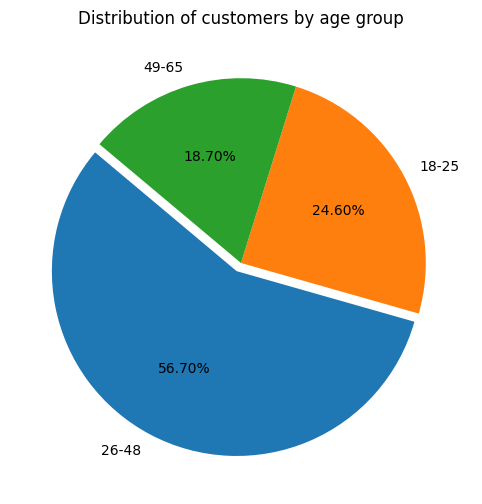

In [28]:
plt.figure(figsize=(8, 6))
plt.pie(age_group_counts,labels=age_group_counts.index,autopct='%1.2f%%',explode=(0.05,0,0), startangle=140)
plt.title("Distribution of customers by age group")
plt.show()

## DATA VISUALISATION FOR LOCATION WISE GENDER

In [29]:
# Prepare the data for stacked bar chart
gender_distribution = df_customers.groupby(['location', 'gender']).size().unstack(fill_value=0)
gender_distribution

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


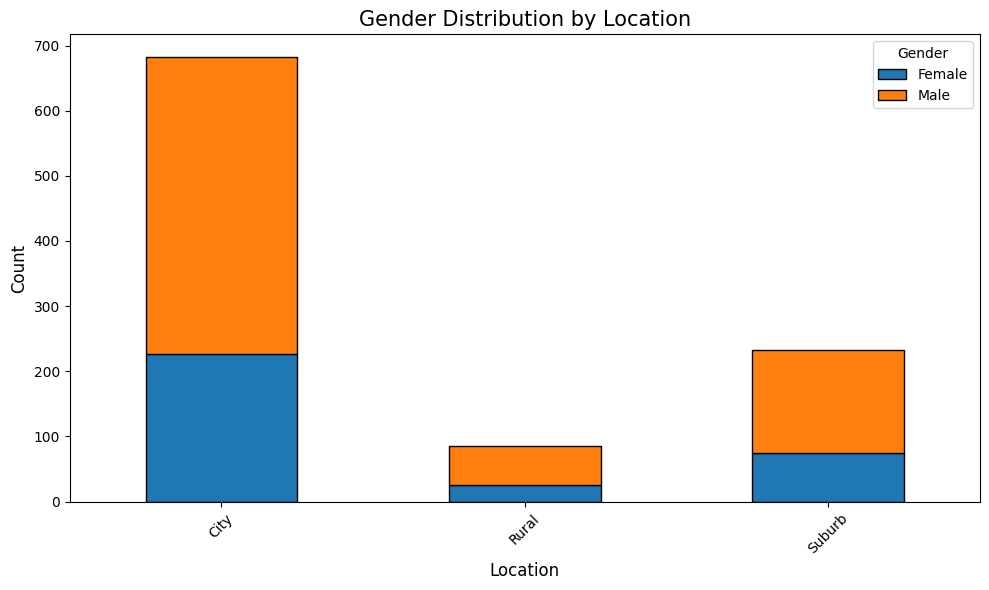

In [30]:
# Plot the stacked bar chart
gender_distribution.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=['#1f77b4', '#ff7f0e'],  # Colors for Male and Female
    edgecolor='black'
)

# Add labels and title
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution by Location', fontsize=15)
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# DATA CLEANING AND VISUALISATION IN CREDIT PROFILE DATASET

In [31]:
df_credit_profiles.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [32]:
print(df_credit_profiles.shape)
print(df_customers.shape)

(1004, 6)
(1000, 9)


As we can see there are duplicates in credit profiles dataset, since each customer can have single credit profile.

## HANDLING DUPLICATES

In [33]:
df_credit_profiles[df_credit_profiles['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [34]:
df_credit_profiles_cleaned = df_credit_profiles.drop_duplicates(subset='cust_id',keep='last')
df_credit_profiles_cleaned[df_credit_profiles_cleaned['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [35]:
df_credit_profiles_cleaned.shape

(1000, 6)

## HANDLING NaN VALUES

In [36]:
df_credit_profiles_cleaned.isna().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [37]:
df_credit_profiles_cleaned[df_credit_profiles_cleaned['credit_limit'].isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [38]:
df_credit_profiles_cleaned['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

In [39]:
df_credit_profiles_cleaned['credit_limit'].unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

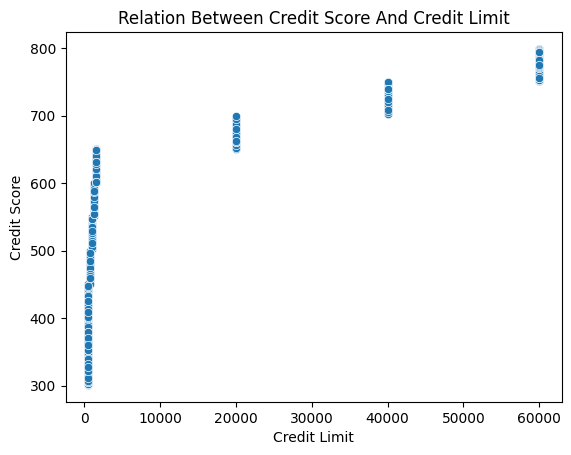

In [40]:
sns.scatterplot(y=df_credit_profiles_cleaned.credit_score,x=df_credit_profiles_cleaned.credit_limit)
plt.title("Relation Between Credit Score And Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Credit Score")

plt.show()

### As we can see in the scatterplot, there is a correlation between credit score and credit limit.

In [41]:
df_credit_profiles_cleaned['credit_score'].describe()

count    1000.000000
mean      589.182000
std       152.284929
min       300.000000
25%       460.000000
50%       601.500000
75%       738.000000
max       799.000000
Name: credit_score, dtype: float64

In [42]:
bins = range(300, 801, 50)  # 300 to 800 with 50 intervals
labels = [f"{b}-{b+49}" for b in bins[:-1]]  # Create labels for each bin
df_credit_profiles_cleaned['credit_score_group'] = pd.cut(df_credit_profiles_cleaned['credit_score'], bins=bins, labels=labels, include_lowest=True)
df_credit_profiles_cleaned[df_credit_profiles_cleaned['credit_limit'].isna()].head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group
10,11,679,0.557450,9187.0,2.0,NaN,650-699
35,36,790,0.112535,4261.0,1.0,NaN,750-799
37,38,514,0.296971,238.0,2.0,NaN,500-549
45,46,761,0.596041,24234.0,2.0,NaN,750-799
64,65,734,0.473715,13631.0,0.0,NaN,700-749


In [43]:
credit_score_group_wise_mode = df_credit_profiles_cleaned.groupby('credit_score_group')['credit_limit'].apply(lambda x: x.mode()[0])
credit_score_group_wise_mode

credit_score_group
300-349      500.0
350-399      500.0
400-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

In [44]:
df_credit_profiles_cleaned['credit_limit'] = df_credit_profiles_cleaned.apply(lambda row: credit_score_group_wise_mode[row['credit_score_group']] if pd.isna(row['credit_limit']) else row['credit_limit'], axis=1)
df_credit_profiles_cleaned.isna().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_group                0
dtype: int64

In [45]:
df_credit_profiles_cleaned.iloc[[10,35,37,64]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group
10,11,679,0.557450,9187.0,2.0,20000.0,650-699
35,36,790,0.112535,4261.0,1.0,60000.0,750-799
37,38,514,0.296971,238.0,2.0,1000.0,500-549
64,65,734,0.473715,13631.0,0.0,40000.0,700-749


## HANDLING OUTLIERS

In [46]:
df_credit_profiles_cleaned.outstanding_debt.describe()

count      1000.000000
mean       9683.597000
std       25255.893671
min          33.000000
25%         221.000000
50%         550.000000
75%       11819.500000
max      209901.000000
Name: outstanding_debt, dtype: float64

<Axes: xlabel='outstanding_debt'>

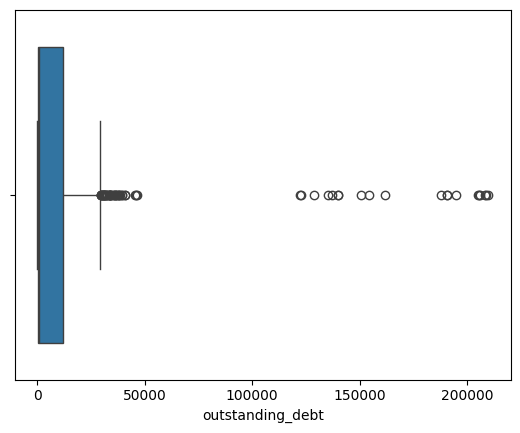

In [47]:
sns.boxplot(x=df_credit_profiles_cleaned.outstanding_debt)

In [48]:
df_credit_profiles_cleaned[df_credit_profiles_cleaned.outstanding_debt>df_credit_profiles_cleaned.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
19,20,647,0.439132,205014.0,3.0,1500.0,600-649
25,26,758,0.250811,190838.0,2.0,60000.0,750-799
38,39,734,0.573023,122758.0,3.0,40000.0,700-749
93,94,737,0.739948,137058.0,2.0,40000.0,700-749
204,205,303,0.364360,187849.0,0.0,500.0,300-349
271,272,703,0.446886,154568.0,1.0,40000.0,700-749
301,302,722,0.608076,122402.0,4.0,40000.0,700-749
330,331,799,0.363420,208898.0,4.0,60000.0,750-799
350,351,320,0.285081,150860.0,0.0,500.0,300-349


In [49]:
df_credit_profiles_cleaned.loc[df_credit_profiles_cleaned.outstanding_debt>df_credit_profiles_cleaned.credit_limit,'outstanding_debt']=df_credit_profiles_cleaned['credit_limit']

In [50]:
df_credit_profiles_cleaned[df_credit_profiles_cleaned.outstanding_debt>df_credit_profiles_cleaned.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group


In [51]:
df_credit_profiles_cleaned.outstanding_debt.describe()

count     1000.000000
mean      6850.084000
std      10683.473561
min         33.000000
25%        221.000000
50%        541.500000
75%      10924.500000
max      60000.000000
Name: outstanding_debt, dtype: float64

## CORRELATION BETWEEN CREDIT PROFILE AND CUSTOMER DATASET COLUMNS

In [52]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [53]:
df_credit_profiles_cleaned.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [54]:
df_merged = df_customers.merge(df_credit_profiles_cleaned,how='inner',on='cust_id')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749


In [55]:
df_merged[['credit_limit','credit_score']].corr()

,credit_limit,credit_score
credit_limit,1.000000,0.847951
credit_score,0.847951,1.000000


In [56]:
numerical_cols = ['credit_score','credit_utilisation','outstanding_debt','credit_limit','age','annual_income']
correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,age,annual_income
credit_score,1.000000,-0.070445,0.680654,0.847951,0.444917,0.575751
credit_utilisation,-0.070445,1.000000,0.192838,-0.080504,-0.027713,-0.086368
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.444301,0.555661
credit_limit,0.847951,-0.080504,0.810581,1.000000,0.510980,0.684780
age,0.444917,-0.027713,0.444301,0.510980,1.000000,0.619037
annual_income,0.575751,-0.086368,0.555661,0.684780,0.619037,1.000000


<Axes: >

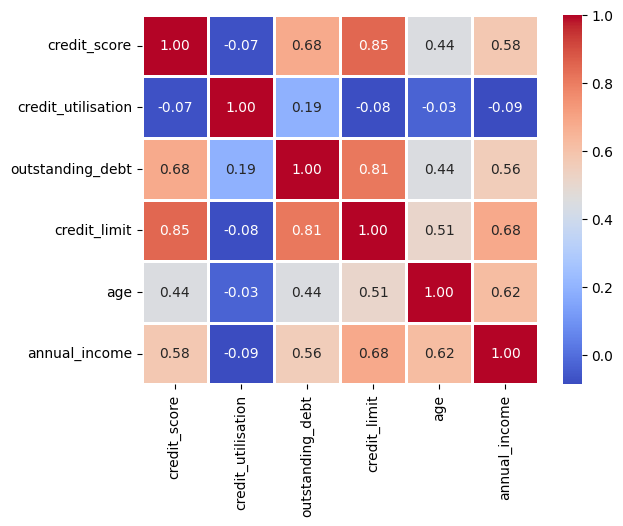

In [57]:
sns.heatmap(correlation_matrix,fmt='.2f',annot=True,linewidths=0.9,linecolor='white',cmap='coolwarm')

# DATA CLEANING AND VISUALISATION IN TRANSACTION DATASET

In [58]:
print(df_transactions.shape)
df_transactions.head()

(500000, 7)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


## HANDLING NaN VALUES

In [59]:
df_transactions.isna().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [60]:
df_transactions[df_transactions['platform'].isna()].sample(10)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
63866,63867,622,2023-02-01,106,NaN,Fashion & Apparel,Phonepe
194829,194830,133,2023-04-07,101,NaN,Fashion & Apparel,Phonepe
16803,16804,154,2023-01-09,421,NaN,Electronics,Gpay
20285,20286,751,2023-01-11,655,NaN,Electronics,Gpay
172168,172169,91,2023-03-27,68,NaN,Beauty & Personal Care,Credit Card
224375,224376,695,2023-04-22,371,NaN,Electronics,Credit Card
256831,256832,796,2023-05-08,96,NaN,Sports,Phonepe
129635,129636,693,2023-03-06,162,NaN,Kitchen Appliances,Net Banking
16540,16541,722,2023-01-09,57,NaN,Fashion & Apparel,Gpay
194027,194028,961,2023-04-07,70,NaN,Fashion & Apparel,Phonepe


<Axes: xlabel='count', ylabel='product_category'>

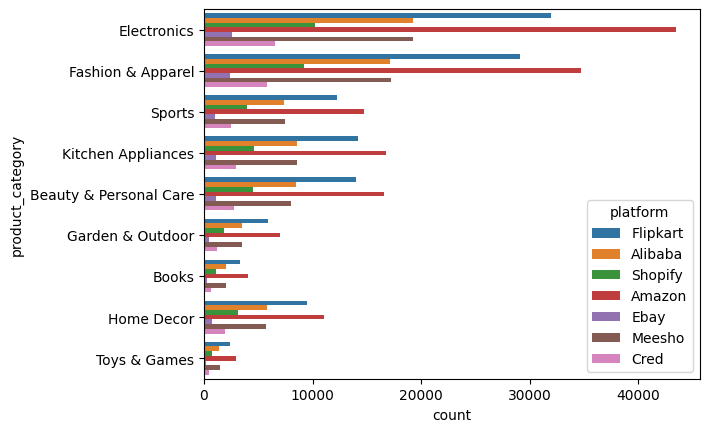

In [61]:
sns.countplot(y=df_transactions['product_category'], hue='platform' ,data=df_transactions)

### As we can see in all product_category the leading platform is amazon so replacing the nan values with amazon is appropriate

In [62]:
df_transactions['platform'].fillna(df_transactions['platform'].mode()[0],inplace=True)

In [63]:
df_transactions.isna().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [64]:
df_transactions.loc[[369884,186702]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
369884,369885,224,2023-07-03,351,Amazon,Home Decor,Credit Card
186702,186703,979,2023-04-03,37,Amazon,Beauty & Personal Care,Debit Card


### TREATING OUTLIERS IN TRAN_AMOUNT COLUMN IN TRANSACTION TABLE

In [65]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [66]:
df_transaction_zero = df_transactions[df_transactions.tran_amount==0]
df_transaction_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [67]:
df_transaction_zero[['product_category','platform','payment_type']].value_counts()

product_category  platform  payment_type
Electronics       Amazon    Credit Card     4734
Name: count, dtype: int64

#### As we can see the transaction that have 0 amount have same platform, product_category, and payment_type

In [68]:
median_to_replace = df_transactions[(df_transactions.platform=='Amazon')&(df_transactions.product_category=='Electronics')&(df_transactions.payment_type=='Credit Card')&(df_transactions.tran_amount!=0)]['tran_amount'].median()
median_to_replace

554.0

In [69]:
df_transactions['tran_amount'].replace(0,median_to_replace,inplace=True)

In [70]:
df_transactions.loc[df_transaction_zero.index].head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,554,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,554,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,554,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,554,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,554,Amazon,Electronics,Credit Card


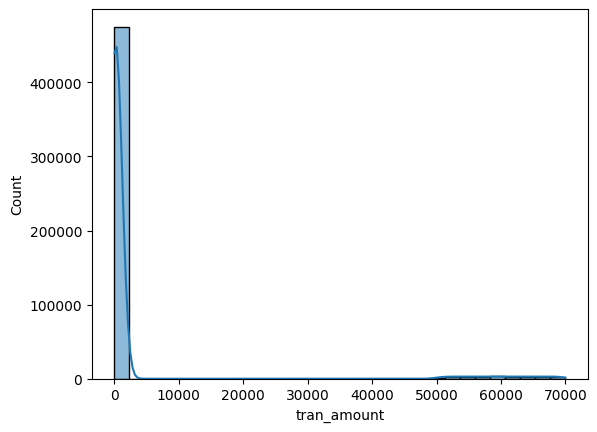

In [71]:
sns.histplot(df_transactions.tran_amount,kde=True,bins=30)
plt.show()

#### Since the distribution is skewed, we cannot use 3 standard deviation to treat outliers
#### So, we use IQR technique with some domain knowledge to treat the outliers

In [72]:
df_transactions.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


In [73]:
Q1, Q3 = df_transactions['tran_amount'].quantile([0.25,0.75])
IQR = Q3 - Q1

# product manager has specified to use 2*IQR instead of 1.5*IQR
lower = Q1 - 2*IQR
upper = Q3 + 2*IQR
lower, upper

(-628.0, 1107.0)

In [74]:
df_transactions_outliers = df_transactions[df_transactions.tran_amount>=upper]
print(df_transactions_outliers.shape)
df_transactions_outliers.head()

(25000, 7)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [75]:
df_transactions_normal = df_transactions[df_transactions.tran_amount<upper]
df_transactions_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [76]:
product_category_wise_mean = df_transactions_normal.groupby('product_category')['tran_amount'].mean()
product_category_wise_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [77]:
df_transactions.loc[df_transactions_outliers.index,'tran_amount']=df_transactions_outliers['product_category'].map(product_category_wise_mean)

In [78]:
df_transactions.loc[df_transactions_outliers.index].head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card


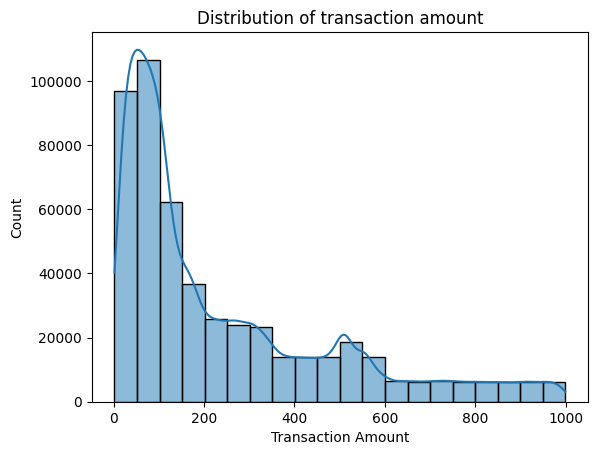

In [79]:
sns.histplot(df_transactions.tran_amount,kde=True,bins=20)
plt.title("Distribution of transaction amount")
plt.xlabel('Transaction Amount')
plt.show()

## DATA VISUALISATION IN TRANSACTION TABLE

In [80]:
df_transactions.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


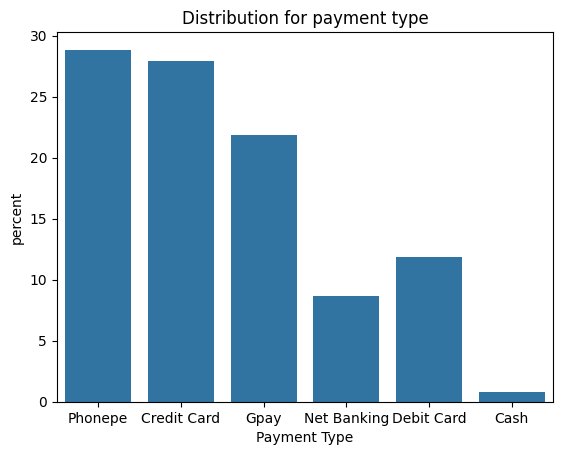

In [81]:
sns.countplot(x=df_transactions.payment_type,stat='percent')
plt.title("Distribution for payment type")
plt.xlabel("Payment Type")
plt.show()

In [82]:
df_customers.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [83]:
df_merged_2 = df_merged.merge(df_transactions,how='inner',on='cust_id')
df_merged_2.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,19571.0,0.0,40000.0,700-749,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


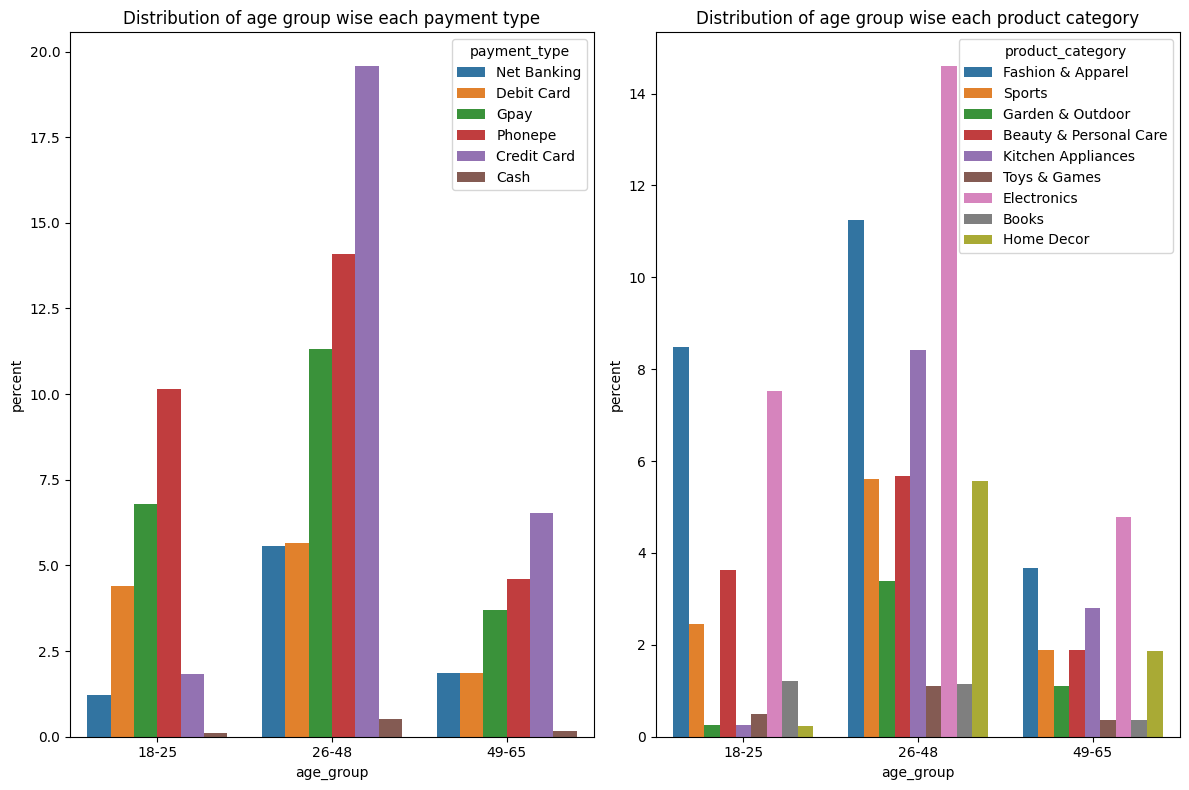

In [84]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes.flatten()

sns.countplot(data=df_merged_2,x='age_group',hue='payment_type',stat='percent',ax=axes[0])
axes[0].set_title("Distribution of age group wise each payment type")
sns.countplot(data=df_merged_2,x='age_group',hue='product_category',stat='percent',ax=axes[1])
axes[1].set_title("Distribution of age group wise each product category")
plt.tight_layout()
plt.show()

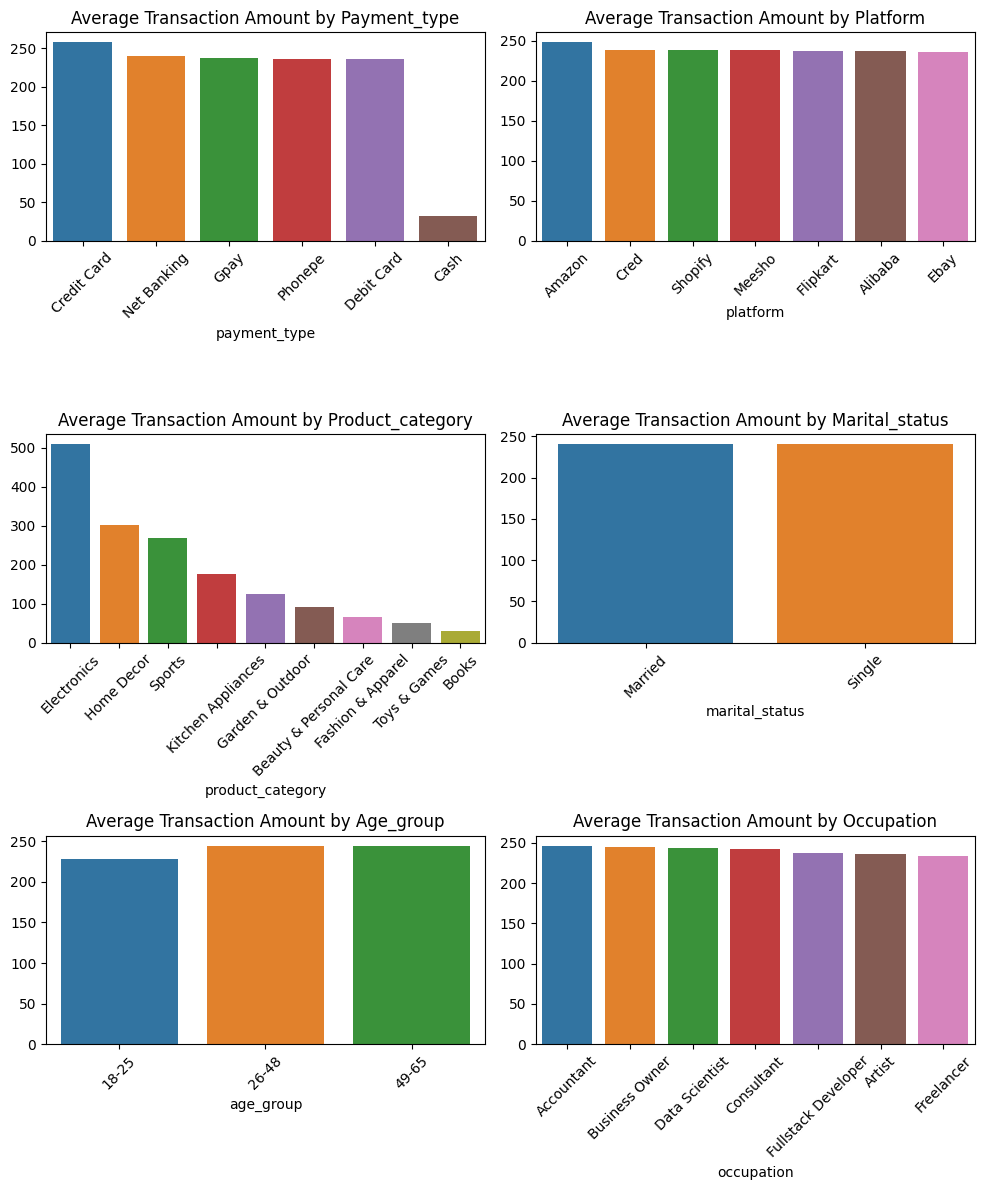

In [101]:
cols_name = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group','occupation']

# Create a grid for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))  # 2 rows, 2 columns

# Flatten the axes for easy iteration
axes = axes.flatten()

for i,col in enumerate(cols_name):
    col_wise_tran_amount= df_merged_2.groupby(col)['tran_amount'].mean().sort_values(ascending=False)
    sns.barplot(
        x=col_wise_tran_amount.index, 
        y=col_wise_tran_amount.values, 
        palette='tab10', 
        ax=axes[i]  # Specify subplot axis
    )
    axes[i].set_title(f"Average Transaction Amount by {col.capitalize()}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [90]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37091.235772,1130.081301,484.451220
1,26-48,145869.623457,20560.405644,597.569665
2,49-65,260165.925134,41699.197861,701.524064


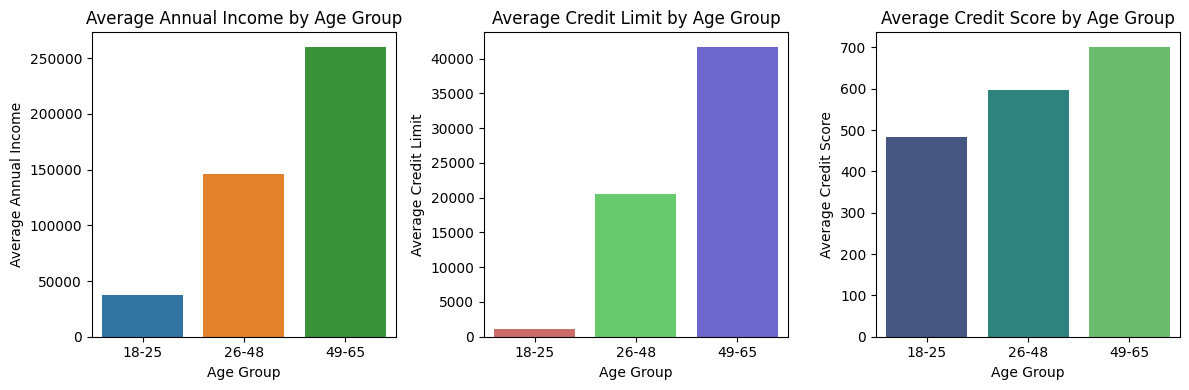

260165.92513368983


In [96]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

#### Targeting Untapped market

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care